In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('LSTM_train_week4.csv', usecols=['Date','Price'])
data.set_index('Date', inplace=True)

In [3]:
data.describe()

,Price
count,505.000000
mean,81.492970
std,17.280587
min,47.620000
25%,68.150000
50%,79.730000
75%,92.520000
max,123.700000


<AxesSubplot:xlabel='Date'>

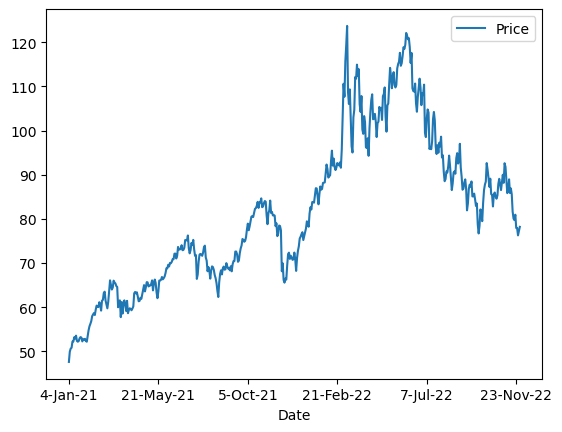

In [4]:
data.plot()

In [5]:
values = data.Price.values
len(values)

505

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
values_scaled = scaler.fit_transform(np.array(values).reshape(-1,1))

In [7]:
print(values.shape)
print(values_scaled.shape)

(505,)
(505, 1)


In [8]:
train_size = int(0.75*len(values))
test_size = len(values) - train_size

In [9]:
values_train = values_scaled[:train_size]
values_val = values_scaled[train_size:]
print(len(values_train), len(values_val))

378 127


In [10]:
def generate_rolling_windows(dataset, width):
    inputs = []
    outputs = []
    for i in range(len(dataset)-1-width):
        inputs.append(dataset[i:i+width])
        outputs.append(dataset[i+width])
    return np.array(inputs), np.array(outputs)

In [11]:
rolling_window_size = 70
X_train, y_train = generate_rolling_windows(values_train, rolling_window_size)
X_val, y_val = generate_rolling_windows(values_val, rolling_window_size)

In [12]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((307, 70, 1), (307, 1), (56, 70, 1), (56, 1))

In [13]:
# y_train = y_train.reshape(y_train.shape[0],)
# y_val = y_val.reshape(y_val.shape[0],)

In [14]:
# X_train.shape, y_train.shape, X_val.shape, y_val.shape

In [15]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [16]:
#Creating LSTM model using keras
np.random.seed(0)
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50,return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1,activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 70, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 70, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [17]:
import random
np.random.seed(0)
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, batch_size=10, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
31/31 [==============================] - 26s 283ms/step - loss: 0.0255 - val_loss: 0.0038
Epoch 2/50
31/31 [==============================] - 5s 151ms/step - loss: 0.0061 - val_loss: 0.0039
Epoch 3/50
31/31 [==============================] - 5s 150ms/step - loss: 0.0052 - val_loss: 0.0046
Epoch 4/50
31/31 [==============================] - 5s 149ms/step - loss: 0.0043 - val_loss: 0.0065
Epoch 5/50
31/31 [==============================] - 5s 149ms/step - loss: 0.0048 - val_loss: 0.0040
Epoch 6/50
31/31 [==============================] - 5s 149ms/step - loss: 0.0042 - val_loss: 0.0098
Epoch 7/50
31/31 [==============================] - 5s 148ms/step - loss: 0.0049 - val_loss: 0.0047
Epoch 8/50
31/31 [==============================] - 5s 152ms/step - loss: 0.0042 - val_loss: 0.0072
Epoch 9/50
31/31 [==============================] - 5s 146ms/step - loss: 0.0044 - val_loss: 0.0040
Epoch 10/50
31/31 [==============================] - 5s 147ms/step - loss: 0.0038 - val_loss: 0.003

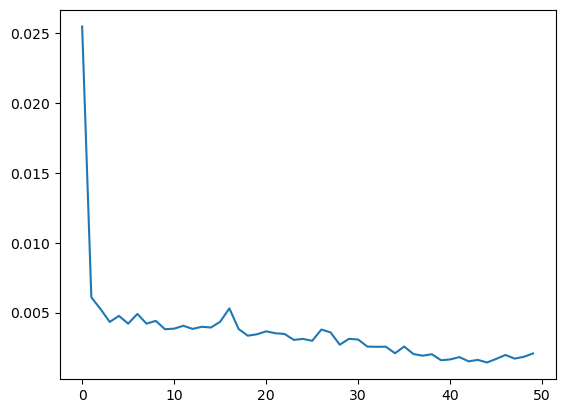

In [18]:
loss = model.history.history['loss']
plt.plot(loss)

In [19]:
#Viewing how good data predictions have been
val_predictions = (model.predict(X_val, verbose = 0))
val_predictions = scaler.inverse_transform(val_predictions)

In [20]:
X_val.shape, val_predictions.shape

((56, 70, 1), (56, 1))

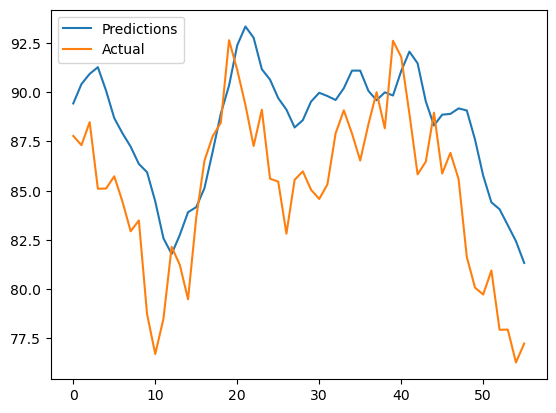

In [21]:
plt.plot(val_predictions, label='Predictions')
plt.plot(scaler.inverse_transform(y_val), label='Actual')
plt.legend()
plt.show()

In [22]:
model.fit(X_val, y_val, batch_size=10, epochs=20)

Epoch 1/20
6/6 [==============================] - 1s 143ms/step - loss: 0.0025
Epoch 2/20
6/6 [==============================] - 1s 142ms/step - loss: 0.0017
Epoch 3/20
6/6 [==============================] - 1s 145ms/step - loss: 0.0014
Epoch 4/20
6/6 [==============================] - 1s 144ms/step - loss: 0.0013
Epoch 5/20
6/6 [==============================] - 1s 145ms/step - loss: 0.0010
Epoch 6/20
6/6 [==============================] - 1s 140ms/step - loss: 0.0010
Epoch 7/20
6/6 [==============================] - 1s 147ms/step - loss: 9.3128e-04
Epoch 8/20
6/6 [==============================] - 1s 142ms/step - loss: 9.7914e-04
Epoch 9/20
6/6 [==============================] - 1s 142ms/step - loss: 9.3531e-04
Epoch 10/20
6/6 [==============================] - 1s 141ms/step - loss: 9.6456e-04
Epoch 11/20
6/6 [==============================] - 1s 143ms/step - loss: 9.3512e-04
Epoch 12/20
6/6 [==============================] - 1s 147ms/step - loss: 9.3598e-04
Epoch 13/20
6/6 [========

In [23]:
last_data = values_scaled[-50:]
last_data.shape

preds = model.predict(last_data.reshape(1,last_data.shape[0],1), verbose=0)
preds.shape
last_data += preds.tolist()

In [24]:
#Predicting next 30 days data using sliding window method
last_data = values_scaled[-50:]
for i in range(30):
    inputs = last_data[-50:]
    last_data = np.append(last_data, model.predict(inputs.reshape(1,inputs.shape[0],1), verbose=0))

In [25]:
last_data.shape

(80,)

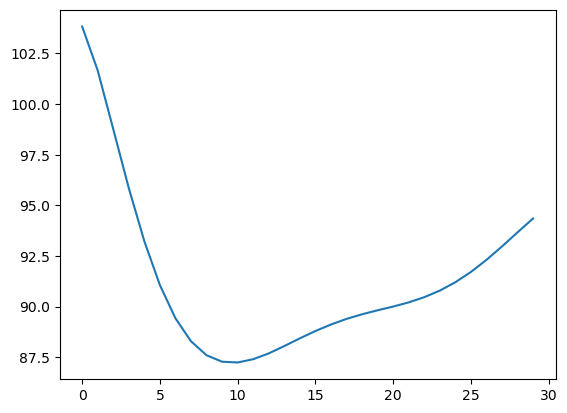

In [26]:
plt.plot(scaler.inverse_transform(last_data[-30:].reshape(-1,1)))
plt.savefig(f'OilPricePredictions_30_days_{rolling_window_size}.png')

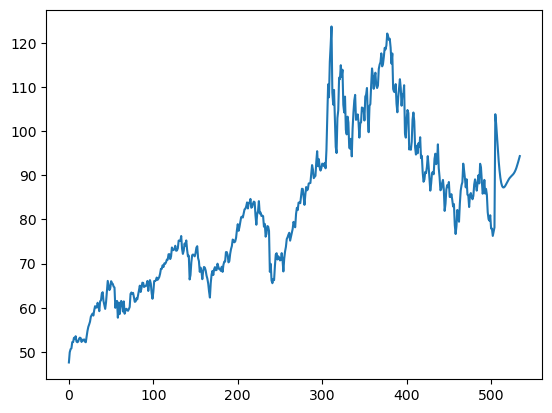

In [27]:
# plt.plot(scaler.inverse_transform(X_train+last_data))
values = np.append(values, scaler.inverse_transform(last_data[-30:].reshape(-1,1)))
plt.plot(values)
plt.savefig(f'OilPricePredictions_530_days_{rolling_window_size}.png')

In [29]:
predictions = pd.DataFrame(scaler.inverse_transform(last_data[-30:].reshape(-1,1)))
predictions.columns = ['Price']
predictions.to_csv('Oil Price Predictions.csv')